In [5]:
import os
import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### CycleGAN

In [1]:
experiment = "apis_paired_resnet9_ADC2DWI"

# mypath_rec = "results/"+experiment+"/test_latest/images/old/"
# mypath_fake_B = "results/"+experiment+"/test_latest/images/fake_B/"
# mypath_real_A = "results/"+experiment+"/test_latest/images/real_A/"
# mypath_real_B = "results/"+experiment+"/test_latest/images/real_B/"
# mypath_fake_A = "results/"+experiment+"/test_latest/images/fake_A/"
mypath_rec = "../AttentionGAN/results/"+experiment+"/test_latest/images/old/"
mypath_fake_B = "../AttentionGAN/results/"+experiment+"/test_latest/images/fake_B/"
mypath_real_A = "../AttentionGAN/results/"+experiment+"/test_latest/images/real_A/"
mypath_real_B = "../AttentionGAN/results/"+experiment+"/test_latest/images/real_B/"
mypath_fake_A = "../AttentionGAN/results/"+experiment+"/test_latest/images/fake_A/"

mylist = os.listdir(mypath_fake_A)
mylist.sort()

#test_000_10_fake_A.png
adc2ncct = []
ncct2adc = []

adc2adc = []
ncct2ncct = []

for k,fn in enumerate(mylist):
    print("ADC 2 NCCT... "+str(int(100*(k+1)/len(mylist)))+"%", end="\r")
    img_fake_a = mpimg.imread(os.path.join(mypath_fake_A,fn))[:,:,0]
    img_fake_b = mpimg.imread(os.path.join(mypath_fake_B,fn.replace("A","B")))[:,:,0]
    img_real_a = mpimg.imread(os.path.join(mypath_real_A,fn.replace("fake","real")))[:,:,0]
    img_real_b = mpimg.imread(os.path.join(mypath_real_B,fn.replace("fake","real").replace("A","B")))[:,:,0]
    adc2ncct.append([ssim(img_fake_a,img_real_a), psnr(img_fake_a,img_real_a)])
    ncct2adc.append([ssim(img_fake_b,img_real_b), psnr(img_fake_b,img_real_b)])
    
    img_rec_a = mpimg.imread(os.path.join(mypath_rec,fn.replace("fake","rec")))[:,:,0]
    img_rec_b = mpimg.imread(os.path.join(mypath_rec,fn.replace("fake","rec").replace("A","B")))[:,:,0]
    ncct2ncct.append([ssim(img_rec_a,img_real_a), psnr(img_rec_a,img_real_a)])
    adc2adc.append([ssim(img_rec_b,img_real_b), psnr(img_rec_b,img_real_b)])
    #plt.imshow(img_fake_b, cmap="gray")
    #plt.show()
    #break

print("ADC 2 NCCT", np.mean(np.array(adc2ncct), axis=0))
print("NCCT 2 ADC", np.mean(np.array(ncct2adc), axis=0))

print("ADC 2 ADC", np.mean(np.array(adc2adc), axis=0))
print("NCCT 2 NCCT", np.mean(np.array(ncct2ncct), axis=0))

NameError: name 'os' is not defined

### Create paired dataset

In [ ]:
!python datasets/make_dataset_aligned.py --dataset-path datasets/apis_ss

<br><br>

### Pix2Pix

In [6]:
#experiment = "apis_pix2pix_ADC_NCCT"
experiment = "prueba_p2p_NCCT2ADC"

#mypath_rec = "results/"+experiment+"/test_latest/images/old/"
mypath_fake_B = "results/"+experiment+"/test_latest/images/fake_B/"
mypath_real_A = "results/"+experiment+"/test_latest/images/real_A/"
mypath_real_B = "results/"+experiment+"/test_latest/images/real_B/"
#mypath_fake_A = "results/apis_paired_resnet9/test_latest/images/fake_A/"
mylist = os.listdir(mypath_fake_B)
mylist.sort()

#test_000_10_fake_A.png
adc2ncct = []
ncct2adc = []

#adc2adc = []
#ncct2ncct = []

for k,fn in enumerate(mylist):
    print("ADC 2 NCCT... "+str(int(100*(k+1)/len(mylist)))+"%", end="\r")
    #img_fake_a = mpimg.imread(os.path.join(mypath_fake_A,fn))[:,:,0]
    img_fake_b = mpimg.imread(os.path.join(mypath_fake_B,fn.replace("A","B")))[:,:,0]
    img_real_a = mpimg.imread(os.path.join(mypath_real_A,fn.replace("fake","real").replace("B","A")))[:,:,0]
    img_real_b = mpimg.imread(os.path.join(mypath_real_B,fn.replace("fake","real")))[:,:,0]
    adc2ncct.append([ssim(img_fake_b,img_real_b), psnr(img_fake_b,img_real_b)])
    #ncct2adc.append([ssim(img_fake_b,img_real_b), psnr(img_fake_b,img_real_b)])
    
    #img_rec_a = mpimg.imread(os.path.join(mypath_rec,fn.replace("fake","rec")))[:,:,0]
    #img_rec_b = mpimg.imread(os.path.join(mypath_rec,fn.replace("fake","rec").replace("A","B")))[:,:,0]
    #ncct2ncct.append([ssim(img_rec_a,img_real_a), psnr(img_rec_a,img_real_a)])
    #adc2adc.append([ssim(img_rec_b,img_real_b), psnr(img_rec_b,img_real_b)])
    #plt.imshow(img_rec_b, cmap="gray")
    #plt.show()
    #break

print("ADC 2 NCCT", np.mean(np.array(adc2ncct), axis=0))
#print("NCCT 2 ADC", np.mean(np.array(ncct2adc), axis=0))

#print("ADC 2 ADC", np.mean(np.array(adc2adc), axis=0))
#print("NCCT 2 NCCT", np.mean(np.array(ncct2ncct), axis=0))

FileNotFoundError: [Errno 2] No such file or directory: 'results/prueba_p2p_NCCT2ADC/test_latest/images/fake_B/'

<br><br><br>

In [22]:
def multivariate_gaussian():
    """Return the multivariate Gaussian distribution on array pos."""
    import random
    mean1 = 0
    mean2 = 0
    std1 = random.randrange(25, 50) / 100
    std2 = random.randrange(25, 50) / 100
    
    N = 256
    x = np.linspace(-2, 2, N)
    y = np.linspace(-2, 2, N)
    x, y = np.meshgrid(x, y)

    # Mean vector and covariance matrix
    mu = np.array([mean1, mean2])
    Sigma = np.array([[ std1*2 , 0], [0,  std2*2]])

    # Pack X and Y into a single 3-dimensional array
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x
    pos[:, :, 1] = y

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

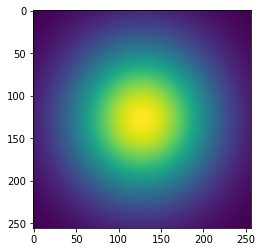

In [26]:
mg = multivariate_gaussian()
plt.imshow(mg)
plt.show()

In [95]:
def multi_gaussian(mu1=0, mu2=0, std1=1, std2=1, b=2):
    x = np.linspace(-b, b, 256)
    y = np.linspace(-b, b, 256)
    x, y = np.meshgrid(x, y)
    X = (x-mu1)*(x-mu1)/(std1*std1)
    Y = (y-mu2)*(y-mu2)/(std2*std2)
    A = 7
    mygaussian = A*np.exp(-((0.5*X)+(0.5*Y)))+3
    return mygaussian

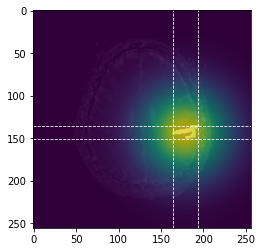

In [96]:
#mymu2 ---> vertical
#mystd2 ---> vertical

mymu1 = 0
mymu2 = 0
mystd1 = 1
mystd2 = 1

myimgpath = "datasets/apis/trainA/train_005_15.png"
myimg = mpimg.imread(myimgpath)
mymaskpath = "datasets/apis/mask/train_005_15.png"
mymask = mpimg.imread(mymaskpath)

vs = np.sum(mymask[...,0], axis=0)
vi = 256-np.where(vs!=0)[0][-1]
vf = 256-np.where(vs!=0)[0][0]
vs = np.sum(mymask[...,0], axis=1)
hi = np.where(vs!=0)[0][0]
hf = np.where(vs!=0)[0][-1]
cx = hi+(hf-hi)/2
cy = vi+(vf-vi)/2
my_b = 3.5

mg2 = multi_gaussian(mu1=(cx*2*my_b/256)-my_b, mu2=(cy*2*my_b/256)-my_b, std1=mystd1, std2=mystd2, b=my_b)
plt.imshow(np.rot90(myimg[...,0]), cmap="gray")
plt.imshow(np.rot90(mymask[...,0]), cmap="gray", alpha=0.7)
plt.imshow(mg2, alpha=0.7)

# vy = 256/4
# z1 = 0
# for i in range(4):
#     z1 += vy
#     plt.axhline(y=z1, color="white", lw=0.5, alpha=0.15)
#     plt.axvline(x=z1, color="white", lw=0.5, alpha=0.15)

plt.axhline(y=vi, color="white", lw=0.8, linestyle="--")
plt.axhline(y=vf, color="white", lw=0.8, linestyle="--")
plt.axvline(x=hi, color="white", lw=0.8, linestyle="--")
plt.axvline(x=hf, color="white", lw=0.8, linestyle="--")

# plt.axvline(x=cx, color="red", lw=0.8, linestyle="--")
# plt.axhline(y=cy, color="red", lw=0.8, linestyle="--")
plt.show()

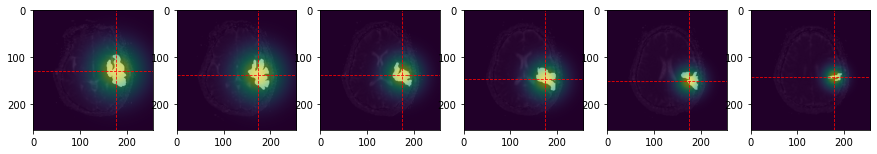

In [125]:
mymu1 = 0
mymu2 = 0
mystd1 = 1
mystd2 = 1

files = ["train_005_10.png", "train_005_11.png", "train_005_12.png", "train_005_13.png", "train_005_14.png", "train_005_15.png"]
num_slices = len(files)

fig, axes = plt.subplots(1, 6, figsize=(15, num_slices*5))
for i in range(num_slices):
    myimgpath = "datasets/apis/trainA/"+files[i]
    myimg = mpimg.imread(myimgpath)
    mymaskpath = "datasets/apis/mask/"+files[i]
    mymask = mpimg.imread(mymaskpath)

    vs = np.sum(mymask[...,0], axis=0)
    vi = 256-np.where(vs!=0)[0][-1]
    vf = 256-np.where(vs!=0)[0][0]
    vs = np.sum(mymask[...,0], axis=1)
    hi = np.where(vs!=0)[0][0]
    hf = np.where(vs!=0)[0][-1]
    cx = hi+(hf-hi)/2
    cy = vi+(vf-vi)/2
    my_b = 3.5*(64/np.max([hf-hi, vf-vi]))
    
    mg2 = multi_gaussian(mu1=(cx*2*my_b/256)-my_b, mu2=(cy*2*my_b/256)-my_b, std1=mystd1, std2=mystd2, b=my_b)
    axes[i].imshow(np.rot90(myimg[...,0]), cmap="gray")
    axes[i].imshow(np.rot90(mymask[...,0]), cmap="gray", alpha=0.8)
    axes[i].imshow(mg2, alpha=0.5)
    axes[i].axvline(x=cx, color="red", lw=0.8, linestyle="--")
    axes[i].axhline(y=cy, color="red", lw=0.8, linestyle="--")
    #axes[i].set_title(str(hf-hi)+", "+str(vf-vi)+"\n"+str(cx)+", "+str(cy))

### NCCT slices exploration

In [29]:
import os
import numpy as np

patients = ['test_000',
 'test_003',
 'test_005',
 'test_006',
 'test_009',
 'test_017',
 'test_018',
 'test_019',
 'test_020',
 'test_022',
 'test_030',
 'test_034',
 'test_037']

pathmask = "../cyclegan_tf/data_val_MASK_ss.npy"
mymasks = np.load(pathmask)
print(mymasks.shape)

pathfilenamestest = "../cyclegan_tf/filenames_test.npy"
myfilenamestest = np.load(pathfilenamestest)
print(myfilenamestest.shape)

xxx = os.listdir("datasets/apis/testA/")
xxx.sort()
print(len(xxx))

(647, 256, 256, 1)
(647,)
647


In [96]:
myslices = []

for i in patients:
    pat = []
    for k,f in enumerate(xxx):
        if f[:8]==i:
            pat.append(f)
    myslices.append(pat)

In [97]:
myindexes = []

for ms in myslices:
    myidx = []
    for f in ms:
        #print(f[:-4])
        for k in range(myfilenamestest.shape[0]):
            if myfilenamestest[k]==f[:-4]:
                #print(myfilenamestest[k], " ---> ", f, " ---> ", k)
                myidx.append(k)
    myindexes.append(myidx)
    #print(".......................................")
    #break

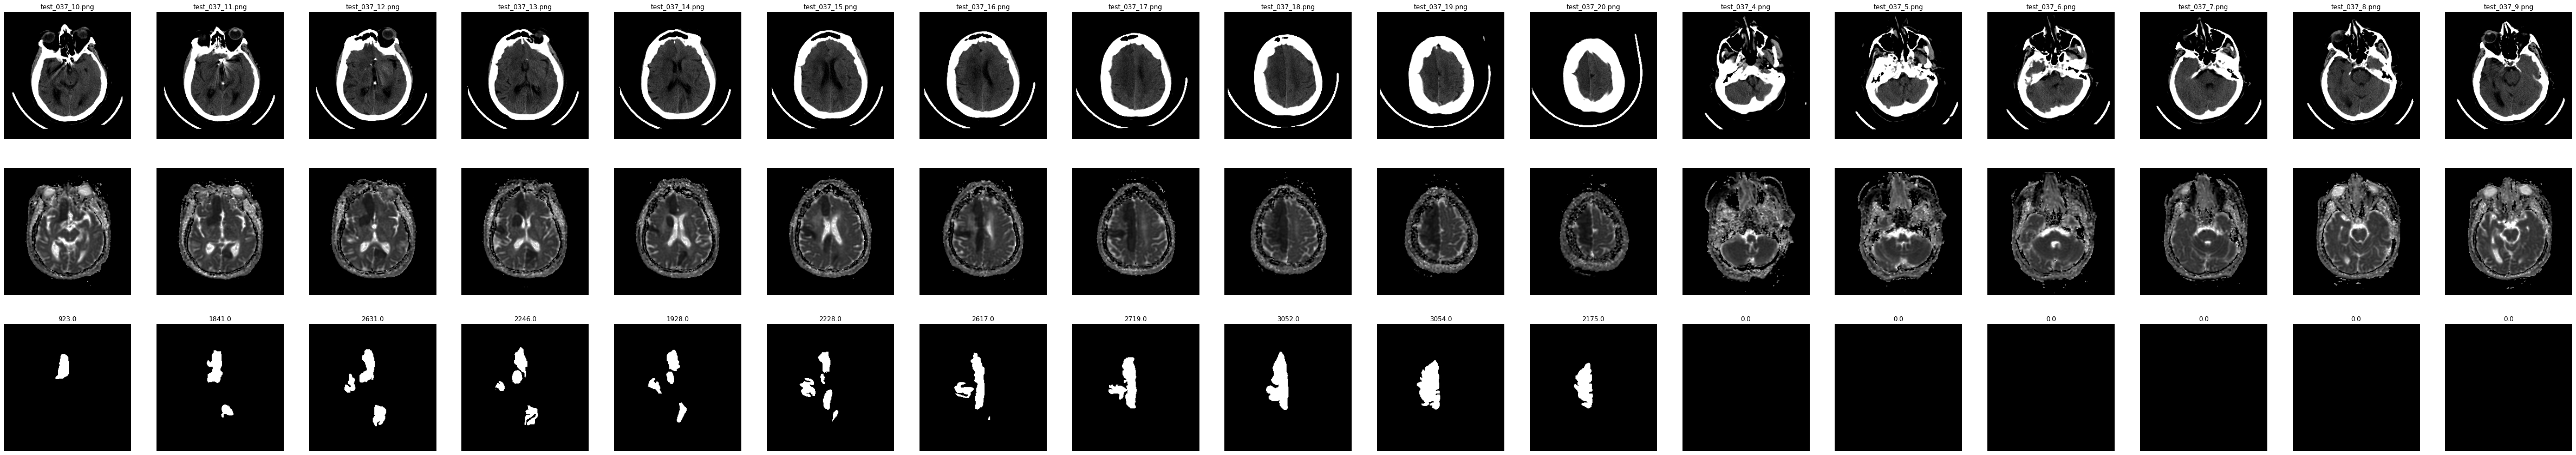

In [114]:
mypath_ncct = "datasets/apis/testA_NCCT/"
mypath_adc = "datasets/apis/testA/"

#k = 0

plt.figure(figsize=(85,15))

for k in range(len(myslices)):
    for i,f in enumerate(myslices[k]):
        myimg_ncct = mpimg.imread(mypath_ncct+f)
        myimg_adc = mpimg.imread(mypath_adc+f)
        #plt.imshow(np.rot90(myimg[...,0]), cmap="gray")
        plt.subplot(3,len(myslices[k]),i+1)
        plt.title(f)
        plt.imshow(np.rot90(myimg_ncct[...,0]), cmap="gray")
        plt.axis('off')
        plt.subplot(3,len(myslices[k]),i+len(myslices[k])+1)
        plt.imshow(np.rot90(myimg_adc[...,0]), cmap="gray")
        plt.axis('off')
        #print("index", myindexes[k][i])
        plt.subplot(3,len(myslices[k]),i+2*len(myslices[k])+1)
        plt.title(np.sum(mymasks[myindexes[k][i],:,:,0]))
        plt.imshow(np.rot90(mymasks[myindexes[k][i],:,:,0]), cmap="gray")
        plt.axis('off')
    plt.savefig(myslices[k][0][:-7]+".png", bbox_inches='tight')

In [104]:
myindexes[0]

[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 0, 1, 2, 3, 4, 5]

In [30]:
mypath_fake_A = "results/test_liu_ncct2adc/test_latest/images/fake_B/"
fn = "test_033_87_fake_B.png"

img_fake_a = mpimg.imread(os.path.join(mypath_fake_A,fn))[:,:,0]

mypath_fake_A = "results/test_liu_ncct2adc/test_latest/images/real_B/"
fn = "test_033_87_real_B.png"

img_real_a = mpimg.imread(os.path.join(mypath_fake_A,fn))[:,:,0]

print(ssim(img_real_a, img_fake_a))
print(psnr(img_real_a, img_fake_a))

0.913504426680366
25.856325512776202


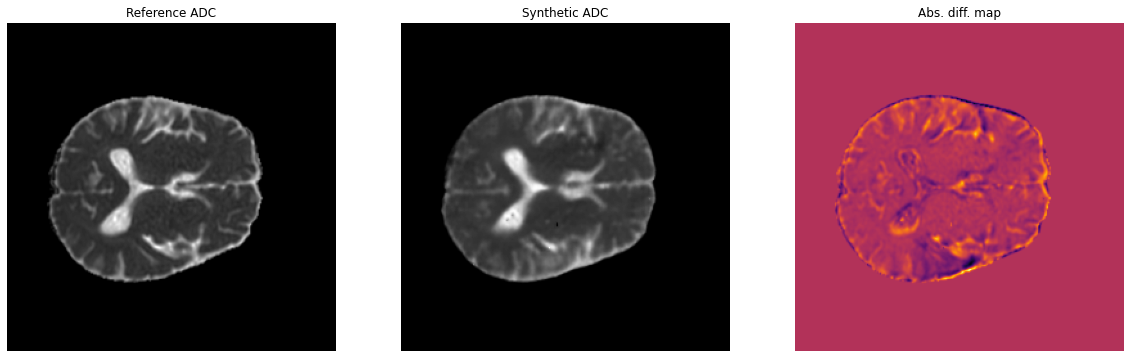

In [28]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(img_real_a, cmap="gray")
plt.title("Reference ADC")
plt.axis(False)
plt.subplot(1,3,2)
plt.imshow(img_fake_a, cmap="gray")
plt.title("Synthetic ADC")
plt.axis(False)
plt.subplot(1,3,3)
plt.imshow(img_real_a-img_fake_a, cmap="inferno")
plt.title("Abs. diff. map")
plt.axis(False)
plt.show()